In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
images = []
labels = []

path = './OCR_dataset/data/training_data/'
dir_list = [ f for f in os.listdir(path) if f != '.DS_Store']
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = [ f for f in os.listdir(dir) if f != '.DS_Store']
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (32, 32))
        img = np.array(img, dtype=np.float32)
        img = img/255
        images.append(img)
        labels.append(i)

path = './OCR_dataset/data2/training_data/'
dir_list = [ f for f in os.listdir(path) if f != '.DS_Store']
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = [ f for f in os.listdir(dir) if f != '.DS_Store']
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (32, 32))
        img = np.array(img, dtype=np.float32)
        img = img/255
        images.append(img)
        labels.append(i)

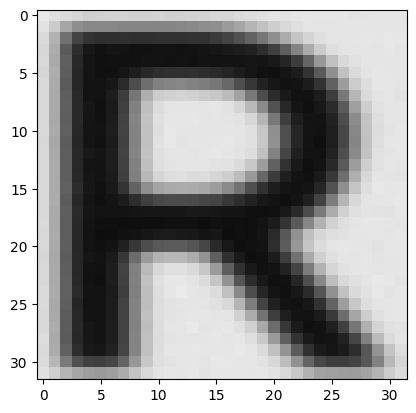

In [3]:
plt.imshow(images[0])

In [4]:
labels[0]

'R'

In [5]:
X = np.array(images)
y = np.array(labels)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
y.shape

(41256,)

In [8]:
X.shape

(41256, 32, 32, 3)

In [9]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [10]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [14]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370,308 (1.41 MB)

 Trainable params: 370,308 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_sh, y_sh, validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10


2024-06-13 05:08:10.549794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2063/2063 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.7448 - loss: 0.9307 - val_accuracy: 0.9458 - val_loss: 0.1681
Epoch 2/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9608 - loss: 0.1171 - val_accuracy: 0.9649 - val_loss: 0.1073
Epoch 3/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9676 - loss: 0.0862 - val_accuracy: 0.9633 - val_loss: 0.0930
Epoch 4/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9755 - loss: 0.0654 - val_accuracy: 0.9697 - val_loss: 0.0824
Epoch 5/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9796 - loss: 0.0523 - val_accuracy: 0.9680 - val_loss: 0.0930
Epoch 6/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9793 - loss: 0.0574 - val_accuracy: 0.9769 - val_loss: 0.0697
Epoch 7/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9811 - loss: 0.0523 - val_accuracy: 0.9749 - val_loss: 0.0819
Epoch 8/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9817 - loss: 0.04

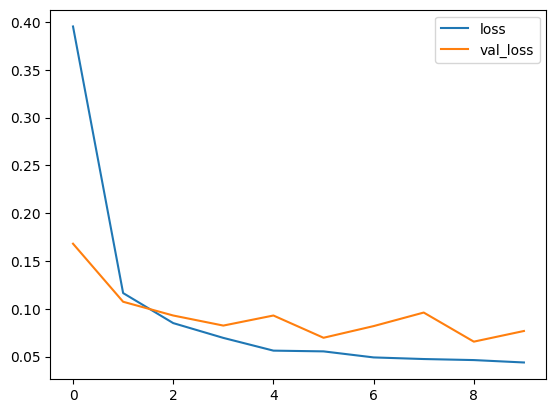

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

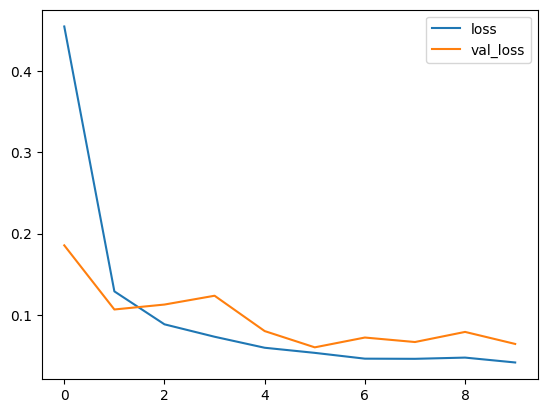

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

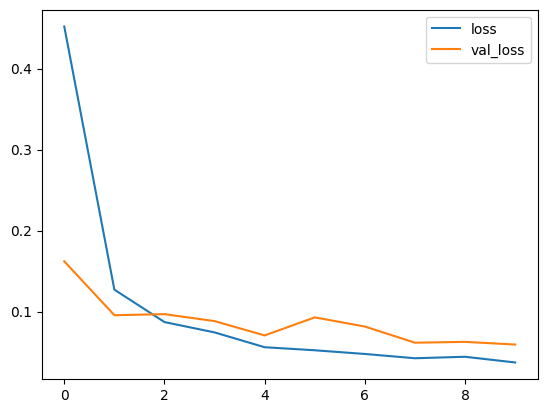

In [164]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [20]:
test_images = []
test_labels = []
 
path = './OCR_dataset/data/testing_data/'
 
dir_list = [ f for f in os.listdir(path) if f != '.DS_Store']
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = [ f for f in os.listdir(dir) if f != '.DS_Store']
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (32, 32))
        img = np.array(img, dtype=np.float32)
        img = img/255
        test_images.append(img)
        test_labels.append(i)

In [21]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [22]:
y_test

array(['R', 'R', 'R', ..., 'W', 'W', 'W'], dtype='<U1')

In [23]:
preds = model.predict(X_test)
pred_labels = le.inverse_transform(np.argmax(preds, axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [111]:
preds

array([[1.4187853e-28, 5.7358924e-35, 1.4884306e-26, ..., 8.6789743e-16,
        1.5432341e-29, 3.3690165e-18],
       [8.4783914e-28, 1.9943398e-34, 4.9927574e-26, ..., 9.9061154e-14,
        1.4443904e-22, 1.1058658e-21],
       [1.8564103e-30, 1.3187905e-36, 2.1987164e-27, ..., 3.3931793e-15,
        4.3800866e-25, 2.4808565e-22],
       ...,
       [4.5856544e-17, 8.2156042e-26, 4.8937726e-29, ..., 4.0854149e-18,
        3.3692255e-16, 3.8272080e-24],
       [1.5349440e-14, 1.1100797e-21, 4.1833884e-23, ..., 6.9446361e-14,
        5.2760683e-15, 1.8010576e-17],
       [5.2830407e-20, 8.5886940e-31, 5.4344148e-38, ..., 1.1968696e-23,
        4.3248282e-18, 2.9680924e-32]], dtype=float32)

In [112]:
pred_labels

array(['R', 'R', 'R', ..., 'W', 'W', 'W'], dtype='<U1')

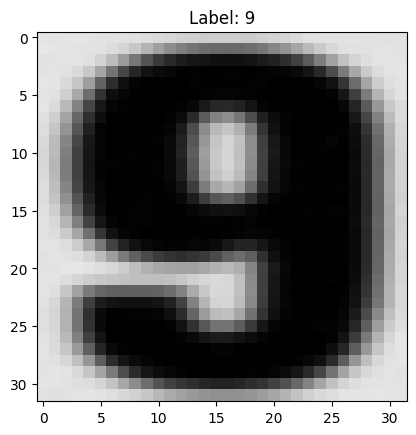

In [24]:
plt.imshow(X_test[57])
plt.title(f"Label: {pred_labels[57]}")
plt.show()

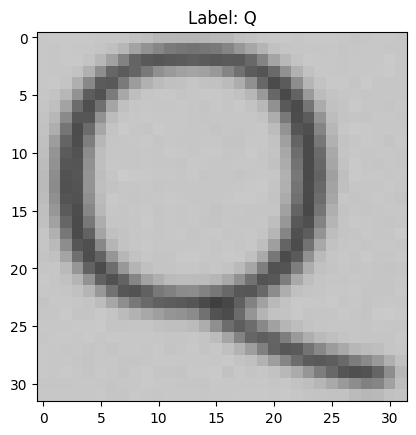

In [39]:
plt.imshow(X_test[650])
plt.title(f"Label: {pred_labels[650]}")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
accuracy_score(y_test, pred_labels)

0.9871031746031746

In [61]:
accuracy_score(y_test, pred_labels)

0.9900793650793651

In [116]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        28
           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        28
           D       1.00      1.00      1.00        28
           E       1.00      1.00      1.00        28
           F       1.00      1.00      1.00        28
           G       1.00      1.00      1.00        28
           H       1.00    

In [28]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        28
           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        28
           D       1.00      1.00      1.00        28
           E       1.00      1.00      1.00        28
           F       1.00      1.00      1.00        28
           G       1.00      1.00      1.00        28
           H       1.00    

In [36]:
q_index = -1
for i in range(645, len(y_test)):
    if y_test[i] == 'Q':
        q_index = i
        break

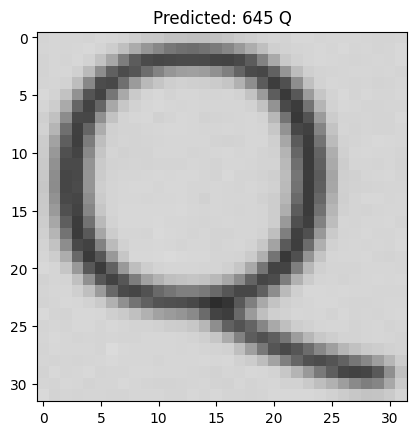

In [37]:
plt.imshow(X_test[q_index])
plt.title(f"Predicted: {q_index} {pred_labels[q_index]}")
plt.show()